In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import requests
import time
import json
from pandas import json_normalize
from scipy.stats import linregress
from pprint import pprint
!pip install pyfiglet
import pyfiglet

In [63]:
# Set the API base URL 
json_url = f"https://data.austintexas.gov/resource/9t4d-g238.json"

# Create URL for GET requests
animal_data = requests.get(json_url).json()

# Convert the API to a DataFrame and display data
animal_df = pd.DataFrame.from_dict(json_normalize(animal_data))
animal_df.tail(5)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
995,A722325,Bella,2016-05-16T15:56:00.000,2016-05-16T15:56:00.000,2015-08-14T00:00:00.000,Return to Owner,Dog,Spayed Female,9 months,Labrador Retriever Mix,Black,NaN
996,A664032,Parker,2013-10-01T17:18:00.000,2013-10-01T17:18:00.000,2013-07-27T00:00:00.000,Adoption,Dog,Spayed Female,2 months,German Shepherd Mix,Black/Tan,NaN
997,A785557,Spicy,2018-12-16T14:59:00.000,2018-12-16T14:59:00.000,2016-12-05T00:00:00.000,Return to Owner,Dog,Intact Male,2 years,American Pit Bull Terrier Mix,Brown/White,NaN
998,A800965,Marley,2019-08-17T16:40:00.000,2019-08-17T16:40:00.000,2016-07-29T00:00:00.000,Adoption,Dog,Spayed Female,3 years,Blue Lacy/Beagle,Blue/White,NaN
999,A805280,*Vincent,2019-12-14T16:55:00.000,2019-12-14T16:55:00.000,2019-06-06T00:00:00.000,Adoption,Cat,Neutered Male,6 months,Domestic Shorthair,Orange Tabby/White,NaN


In [64]:
## JSON results are limited and will not provide 2022 information.
## Switching from JSON to CSV.

In [65]:
# Path to collect CSV data 
csv_url = "https://github.com/SariStormdance/Project_1/blob/main/Resources/Animal_Outcome.csv?raw=true"

# Convert CSV to DataFrame
initial_df = pd.read_csv(csv_url)
initial_df.tail(5)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
153437,A883539,*Pipsqueak,07/19/2023 05:18:00 PM,Jul 2023,02/24/2023,Adoption,NaN,Dog,Intact Female,4 months,Labrador Retriever Mix,Cream/White
153438,A884334,Noche,07/19/2023 05:14:00 PM,Jul 2023,04/01/2023,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair,Black
153439,A885055,Sparky,07/19/2023 05:00:00 PM,Jul 2023,04/12/2023,Adoption,NaN,Cat,Neutered Male,3 months,Siamese,Flame Point
153440,A884031,Bowzer,07/19/2023 05:26:00 PM,Jul 2023,06/27/2019,Adoption,NaN,Dog,Neutered Male,4 years,Labrador Retriever Mix,Cream/Yellow
153441,A883741,*Fiddle,07/19/2023 06:57:00 PM,Jul 2023,06/22/2022,Transfer,Partner,Dog,Intact Male,1 year,Australian Cattle Dog Mix,Tan/White


In [66]:
# Creating a DataFrame copy to reduce to essential columns
reduced_columns_df= initial_df[["Animal ID", "Name", "MonthYear", "Outcome Type", "Animal Type", "Breed", "Age upon Outcome"]].copy()
reduced_columns_df.tail(5)

,Animal ID,Name,MonthYear,Outcome Type,Animal Type,Breed,Age upon Outcome
153437,A883539,*Pipsqueak,Jul 2023,Adoption,Dog,Labrador Retriever Mix,4 months
153438,A884334,Noche,Jul 2023,Adoption,Cat,Domestic Shorthair,3 months
153439,A885055,Sparky,Jul 2023,Adoption,Cat,Siamese,3 months
153440,A884031,Bowzer,Jul 2023,Adoption,Dog,Labrador Retriever Mix,4 years
153441,A883741,*Fiddle,Jul 2023,Transfer,Dog,Australian Cattle Dog Mix,1 year


In [67]:
# Rename column and split a DataFrame column
reduced_columns_df.rename(columns = {"MonthYear":"Month Year"}, inplace = True)
reduced_columns_df[["Month","Year"]] = reduced_columns_df["Month Year"].str.split(" ",expand=True)
reduced_columns_df.tail(5)

,Animal ID,Name,Month Year,Outcome Type,Animal Type,Breed,Age upon Outcome,Month,Year
153437,A883539,*Pipsqueak,Jul 2023,Adoption,Dog,Labrador Retriever Mix,4 months,Jul,2023
153438,A884334,Noche,Jul 2023,Adoption,Cat,Domestic Shorthair,3 months,Jul,2023
153439,A885055,Sparky,Jul 2023,Adoption,Cat,Siamese,3 months,Jul,2023
153440,A884031,Bowzer,Jul 2023,Adoption,Dog,Labrador Retriever Mix,4 years,Jul,2023
153441,A883741,*Fiddle,Jul 2023,Transfer,Dog,Australian Cattle Dog Mix,1 year,Jul,2023


In [68]:
# Cleaning and rearranging the data
updated_columns_df = reduced_columns_df[["Animal ID", "Name", "Month", "Year", "Outcome Type", "Animal Type", "Breed", "Age upon Outcome"]].copy()
updated_columns_df.drop_duplicates(subset=["Animal ID"])
updated_columns_df.tail(5)

,Animal ID,Name,Month,Year,Outcome Type,Animal Type,Breed,Age upon Outcome
153437,A883539,*Pipsqueak,Jul,2023,Adoption,Dog,Labrador Retriever Mix,4 months
153438,A884334,Noche,Jul,2023,Adoption,Cat,Domestic Shorthair,3 months
153439,A885055,Sparky,Jul,2023,Adoption,Cat,Siamese,3 months
153440,A884031,Bowzer,Jul,2023,Adoption,Dog,Labrador Retriever Mix,4 years
153441,A883741,*Fiddle,Jul,2023,Transfer,Dog,Australian Cattle Dog Mix,1 year


In [69]:
# Narrowing dataset to 2022 timeframe
defined_year_df = updated_columns_df[updated_columns_df["Year"] == "2022"]
defined_year_df.tail(5)

,Animal ID,Name,Month,Year,Outcome Type,Animal Type,Breed,Age upon Outcome
153073,A857909,Yumi,Jun,2022,Adoption,Dog,Pit Bull Mix,8 months
153108,A853013,Ashe,Apr,2022,Adoption,Cat,Domestic Shorthair,5 months
153197,A862948,*Christine,Aug,2022,Transfer,Cat,Domestic Shorthair Mix,3 months
153355,A850898,Xena,Feb,2022,Adoption,Dog,Siberian Husky Mix,2 months
153422,A869924,NaN,Dec,2022,Transfer,Cat,Domestic Shorthair,2 years


In [70]:
# Resetting index for tracking purposes
index_reset_df = defined_year_df.reset_index(drop=True)
index_reset_df.tail(5)

,Animal ID,Name,Month,Year,Outcome Type,Animal Type,Breed,Age upon Outcome
11875,A857909,Yumi,Jun,2022,Adoption,Dog,Pit Bull Mix,8 months
11876,A853013,Ashe,Apr,2022,Adoption,Cat,Domestic Shorthair,5 months
11877,A862948,*Christine,Aug,2022,Transfer,Cat,Domestic Shorthair Mix,3 months
11878,A850898,Xena,Feb,2022,Adoption,Dog,Siberian Husky Mix,2 months
11879,A869924,NaN,Dec,2022,Transfer,Cat,Domestic Shorthair,2 years


In [71]:
#Display total animal counts
index_reset_df["Animal Type"].value_counts()

Dog          6412
Cat          4766
Other         592
Bird          109
Livestock       1
Name: Animal Type, dtype: int64

In [72]:
# Create separate dataframe for cat outcomes
Cat = ["Cat"] 
cat_outcomes_df = index_reset_df[index_reset_df["Animal Type"].isin(Cat)]
cat_outcomes_df.head(5)

,Animal ID,Name,Month,Year,Outcome Type,Animal Type,Breed,Age upon Outcome
0,A860161,*Lalo,Jul,2022,Adoption,Cat,Domestic Shorthair,2 months
2,A848454,Olli,Jan,2022,Adoption,Cat,Domestic Shorthair Mix,7 years
3,A822928,*Primrose,Jan,2022,Adoption,Cat,Domestic Shorthair,11 years
5,A852822,*Dreamsicle,Mar,2022,Adoption,Cat,Domestic Shorthair,2 years
13,A856357,*Manon,Jun,2022,Adoption,Cat,Domestic Shorthair,2 months


In [73]:
# Data check: display monthly cat totals
cat_outcomes_df["Month"].value_counts()

Aug    587
Jun    581
Jul    536
May    503
Sep    430
Jan    375
Dec    368
Nov    335
Oct    316
Apr    296
Mar    228
Feb    211
Name: Month, dtype: int64

In [74]:
# Data check: display cat outcome types
cat_outcomes_df["Outcome Type"].value_counts()

Adoption           3194
Transfer           1177
Return to Owner     152
Euthanasia          142
Died                 54
Rto-Adopt            31
Disposal             12
Missing               3
Relocate              1
Name: Outcome Type, dtype: int64

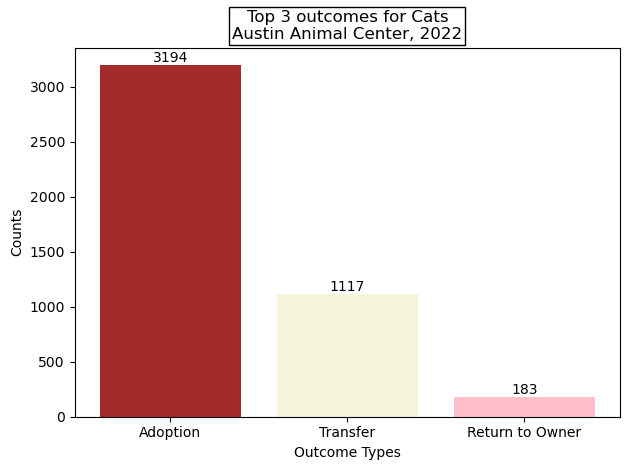

In [75]:
# Plotting Cat Outcomes
# We deemed Return to Owner and Rto-Adopt to be duplicate but equal categories. 
#The two values were added together under "Return to Owner".

desired_outcomes = ['Adoption', 'Transfer', 'Return to Owner']
outcome_counts = {'Adoption': 3194, 'Transfer': 1117, 'Return to Owner': 183,} 
outcome_colors = {'Adoption': 'brown', 'Return to Owner': 'pink', 'Transfer': 'beige'}
outcome_types = list(outcome_counts.keys())
counts = list(outcome_counts.values())

plt.bar(outcome_types, counts, color=[outcome_colors[outcome] for outcome in outcome_types])
plt.xlabel('Outcome Types')
plt.ylabel('Counts')
plt.title("Top 3 outcomes for Cats\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':2})

for index, value in enumerate(outcome_counts.values()):  
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

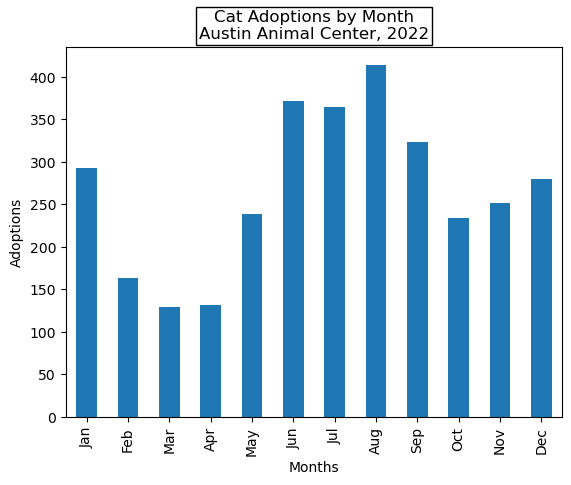

In [76]:
# Plotting Cat Adoptions by Month
cat_adoptions_df = cat_outcomes_df.loc[cat_outcomes_df["Outcome Type"] == "Adoption"]
cat_adoptions_df["Month"].value_counts()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_df = pd.DataFrame(cat_adoptions_df["Month"].value_counts(), index=months)
month_df['Month'].plot(kind="bar", xlabel="Months", ylabel="Adoptions")
plt.title("Cat Adoptions by Month\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':2})
plt.show()

In [77]:
# Data check: Cat Breeds
cat_outcomes_df["Breed"].value_counts()

Domestic Shorthair                         3140
Domestic Shorthair Mix                      925
Domestic Medium Hair                        276
Domestic Longhair                           109
Siamese                                      80
Domestic Medium Hair Mix                     77
Domestic Longhair Mix                        67
Siamese Mix                                  42
Maine Coon                                    7
Snowshoe Mix                                  5
Russian Blue Mix                              4
Manx                                          3
Snowshoe                                      3
Manx Mix                                      3
Himalayan                                     3
Devon Rex                                     2
Ragdoll                                       2
Russian Blue                                  2
Maine Coon Mix                                2
Balinese Mix                                  2
Ragdoll Mix                             

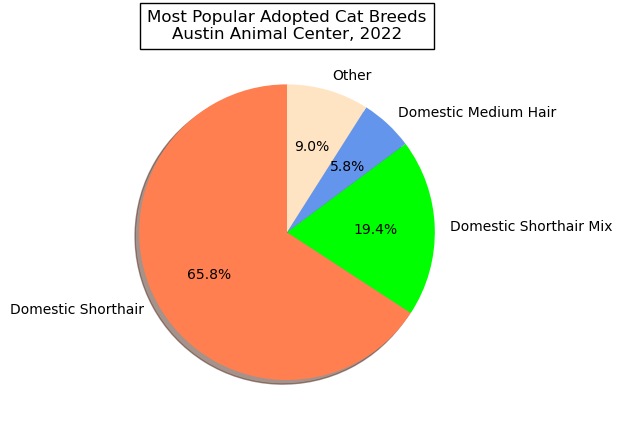

In [78]:
# Plotting Most Popular Cat Breeds
clabels = ["Domestic Shorthair", "Domestic Shorthair Mix", "Domestic Medium Hair", "Other"]
csizes = [65.8, 19.4, 5.8, 9.0]
ccolors = ["coral", "lime", "cornflowerblue", "bisque"]

plt.pie(csizes, labels=clabels, colors=ccolors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Most Popular Adopted Cat Breeds\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':5})

plt.show()

In [79]:
# Create separate dataframe for dog outcomes
Dog = ["Dog"] 
dog_outcomes_df = index_reset_df[index_reset_df["Animal Type"].isin(Dog)]
dog_outcomes_df.head(5)

,Animal ID,Name,Month,Year,Outcome Type,Animal Type,Breed,Age upon Outcome
1,A595061,Gypsy,Aug,2022,Return to Owner,Dog,Labrador Retriever Mix,11 years
4,A856853,Jameson,May,2022,Adoption,Dog,Black Mouth Cur Mix,6 months
6,A851472,A851472,Feb,2022,Transfer,Dog,Cairn Terrier Mix,1 year
7,A870443,Heidi,Dec,2022,Adoption,Dog,Jack Russell Terrier/Chihuahua Shorthair,12 years
8,A851434,Taco Bell,Feb,2022,Transfer,Dog,Chihuahua Shorthair,12 years


In [80]:
# Data check: display monthly dog totals
dog_outcomes_df["Month"].value_counts()

Aug    641
Apr    603
Jan    600
Jul    583
Sep    562
Jun    551
Mar    539
Feb    536
May    519
Oct    441
Dec    435
Nov    402
Name: Month, dtype: int64

In [81]:
# Data check: display dog outcome types
dog_outcomes_df["Outcome Type"].value_counts()

Adoption           3410
Transfer           1782
Return to Owner     951
Rto-Adopt           123
Euthanasia           97
Died                 34
Disposal             13
Stolen                2
Name: Outcome Type, dtype: int64

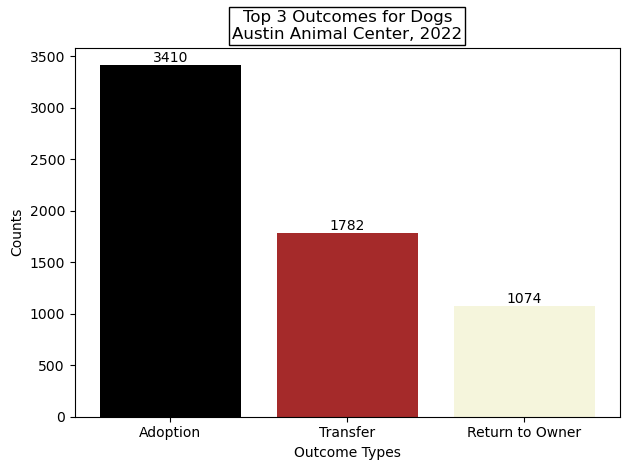

In [82]:
# Plotting Dog Outcomes
# We deemed Return to Owner and Rto-Adopt to be duplicate but equal categories. 
#The two values were added together under "Return to Owner".

dog_desired_outcomes = ['Adoption', 'Transfer', 'Return to Owner',]
dog_outcome_counts = {'Adoption': 3410, 'Transfer': 1782, 'Return to Owner': 1074}
dog_outcome_colors = {'Adoption': 'black', 'Return to Owner': 'beige', 'Transfer': 'brown'}
plt.bar(dog_outcome_counts.keys(), dog_outcome_counts.values(), color=[dog_outcome_colors.get(outcome, 'gray') for outcome in dog_outcome_counts.keys()])

for index, value in enumerate(dog_outcome_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.xlabel('Outcome Types')
plt.ylabel('Counts')
plt.title("Top 3 Outcomes for Dogs\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':2})
plt.tight_layout()

plt.show()

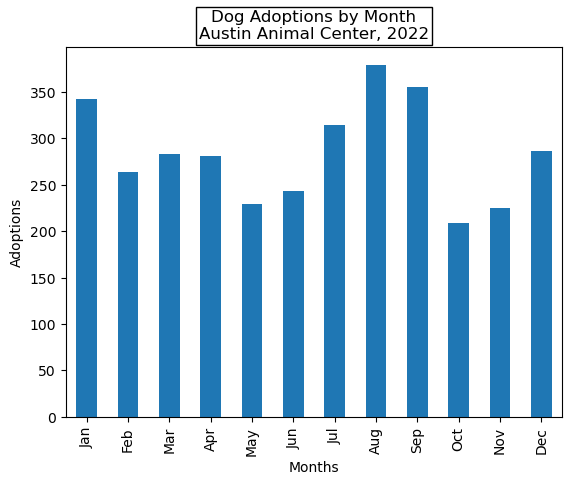

In [83]:
# Plotting Dog Adoptions by Month 
dog_adoptions_df = dog_outcomes_df.loc[dog_outcomes_df["Outcome Type"] == "Adoption"]
dog_adoptions_df["Month"].value_counts()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_df = pd.DataFrame(dog_adoptions_df["Month"].value_counts(), index=months)
month_df['Month'].plot(kind="bar", xlabel="Months", ylabel="Adoptions")
plt.title("Dog Adoptions by Month\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':2})

plt.show()

In [84]:
# Data check: Dog Breeds
dog_outcomes_df["Breed"].value_counts()

Pit Bull                            623
Labrador Retriever Mix              522
Pit Bull Mix                        471
German Shepherd Mix                 330
Chihuahua Shorthair                 254
                                   ... 
Brittany/St. Bernard Smooth Coat      1
Bull Terrier Mix                      1
Leonberger                            1
Cairn Terrier/Chihuahua Longhair      1
Australian Kelpie/Collie Smooth       1
Name: Breed, Length: 604, dtype: int64

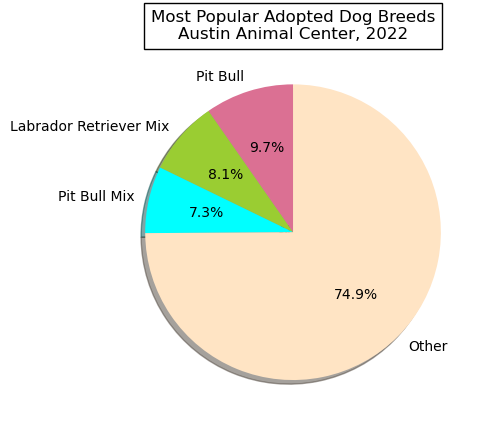

In [85]:
# Plotting Most Popular Dog Breeds
dlabels = ["Pit Bull", "Labrador Retriever Mix", "Pit Bull Mix", "Other"]
dsizes = [9.7, 8.1, 7.3, 74.9]
dcolors = ["palevioletred", "yellowgreen", "cyan", "bisque"]

plt.pie(dsizes, labels=dlabels, colors=dcolors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Most Popular Adopted Dog Breeds\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':5})

plt.show()

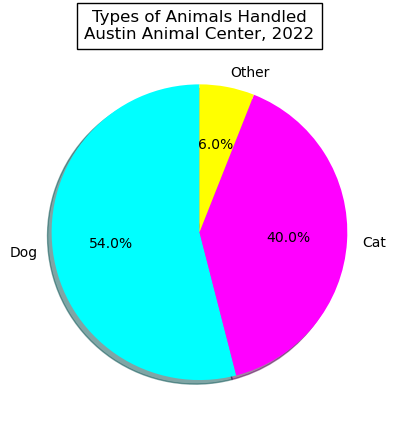

In [86]:
# Plotting Percentage of Animals Handled
alabels = ["Dog", "Cat", "Other"]
asizes = [54, 40, 6]
acolors = ["cyan", "magenta", "yellow"]

plt.pie(asizes, labels=alabels, colors=acolors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Types of Animals Handled\n" + "Austin Animal Center, 2022", bbox={'facecolor':'1', 'pad':5})

plt.show()

In [87]:
# End of presentation
result = pyfiglet.figlet_format("THANK YOU!", font = "digital", justify= "center")
print(result)

                             +-+-+-+-+-+ +-+-+-+-+
                             |T|H|A|N|K| |Y|O|U|!|
                             +-+-+-+-+-+ +-+-+-+-+

